What is Bayes Rule?

Simply stated, Bayes' Theorem finds the probability of a given event based on some prior knowledge of something that affects the event. Going back to our graduate example, the probability of having a large number of graduates is probably reliant on the year chosen. So by giving the year, you could come up with the probability of having a large number of students.

So what does this theorem look like?

P(Large Class | 2017) = (P(2017 | Large Class) * P(Large Class))/ P(2017)

The Prior is P(Large Class)
The posterior is P(Large Class | 2017)
The likelihood is P(2017 | Large Class)

Assumptions about Bayes' Theorem
1. P(A) != 0
2. That our prior is correct.

Many examples of Bayesian Inference start with coin flips. We'll use that example here.

Suppose you have a coin that, if flipped, you would expect to have heads 50% of the time. But a friend of yours, who has a penchant for strange objects, gave you the coin, leading you to think that maybe the coin could be a trick coin and could give you more tails than heads.

Assuming that we flip the coin 10 times and we get 3 heads, what's the probability of getting a heads on a given flip?



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



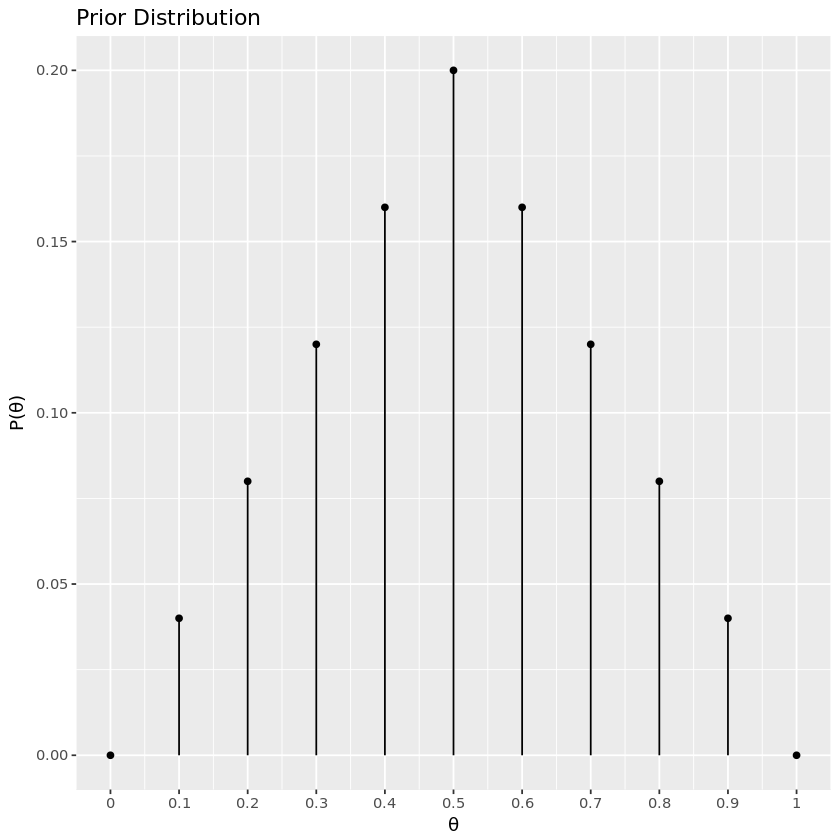

In [1]:
# Here, our prior is .5
# Utilizing functions created by Fong Chun Chan

library(dplyr)
library(ggplot2)

# Uses vals to generate a triangle probability distribution
get_prior_distr <- function(vals) {
  vals.pmin <- pmin(vals, 1 - vals)
  
  # Normalize the prior so that they sum to 1.
  dplyr::data_frame(theta = vals,
                    prior = vals.pmin / sum(vals.pmin))
}

# Define the Space of all theta values
theta.vals <- seq(0, 1, 0.1)

theta.prior.distr.df <- get_prior_distr(theta.vals)

# Plots the Prior Probability Distribution

plot_prior_distr <- function(prior.distr.df, plot.x.labels = TRUE) {
  
  theta.prior.p <- 
    prior.distr.df %>%
    ggplot(aes(x = theta, y = prior)) +
    geom_point() +
    geom_segment(aes(x = theta, xend = theta, y = prior, yend = 0)) +
    xlab(expression(theta)) +
    ylab(expression(paste("P(", theta, ")"))) +
    ggtitle("Prior Distribution") 
  
  if (plot.x.labels) {
    theta.vals <- prior.distr.df[["theta"]]
    
    theta.prior.p <- 
      theta.prior.p + 
      scale_x_continuous(breaks = c(theta.vals),
                         labels = theta.vals)
  }
  
  theta.prior.p
}

plot_prior_distr(theta.prior.distr.df)


In [2]:
# Additional functions
# Get Likelihood Probability Distribution

get_likelihood_df <- function(theta.vals, num.heads, num.tails) {
  likelihood.vals <- c()
  for (cur.theta.val in theta.vals) {
    likelihood.vals <- 
      c(likelihood.vals, 
        (cur.theta.val^num.heads) * (1 - cur.theta.val)^(num.tails))
  }
  
  likelihood.df <- dplyr::data_frame(theta = theta.vals,
                                     likelihood = likelihood.vals)
  likelihood.df
}

# Get Posterior Probability Distribution

get_posterior_df <- function(likelihood.df, prior.distr.df) {
  
  marg.likelihood <- sum(likelihood.df[["likelihood"]])
  
  posterior.df <- 
    likelihood.df %>%
    dplyr::left_join(prior.distr.df) %>%
    dplyr::mutate(marg_likelihood = marg.likelihood) %>%
    dplyr::mutate(post_prob = (likelihood * prior) / marg.likelihood)
  
  posterior.df
}

#' Plots Likelihood Probability Distribution
plot_likelihood_prob_distr <- function(likelihood.df) {
  likelihood.df %>%
    ggplot(aes(x = theta, y = likelihood)) +
    geom_point() +
    geom_segment(aes(x = theta, xend = theta, y = likelihood, yend = 0)) +
    xlab(expression(theta)) +
    ylab(expression(paste("P(D|", theta, ")"))) +
    ggtitle("Likelihood Distribution")
}

#' Plots Posterior Probability Distribution
plot_posterior_prob_distr <- function(posterior.df, theta.vals) {
  posterior.df %>%
    ggplot(aes(x = theta, y = post_prob)) +
    geom_point() +
    geom_segment(aes(x = theta, xend = theta, y = post_prob, yend = 0)) +
    xlab(expression(theta)) +
    ylab(expression(paste("P(", theta, "|D)"))) +
    ggtitle("Posterior Distribution")
}


Joining, by = "theta"


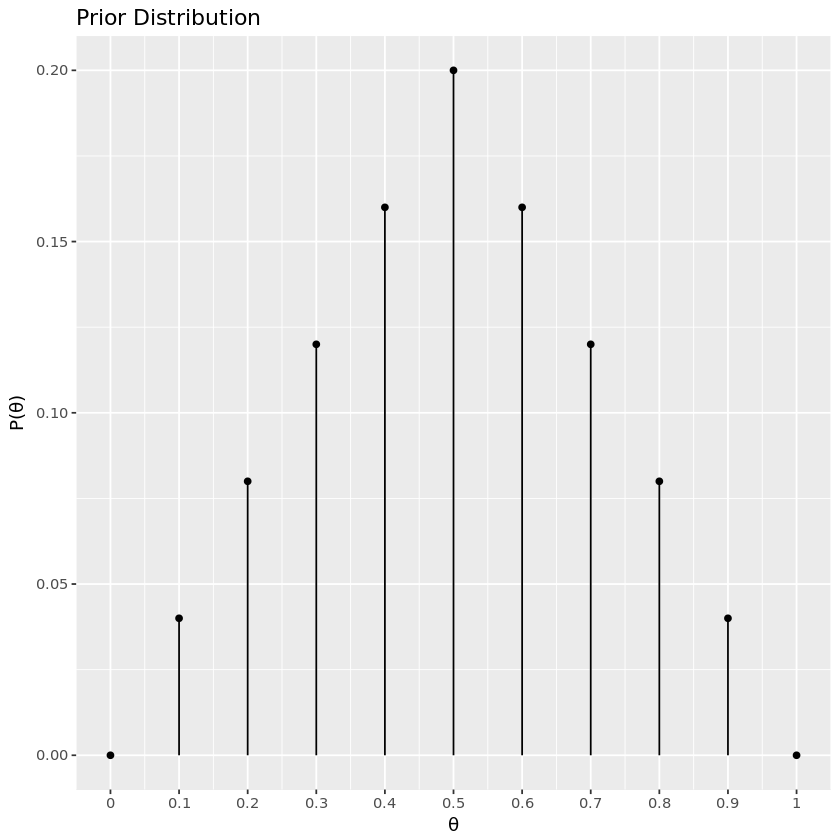

In [5]:
# Here, we apply the functions in order to get the likehood and posterior.
likelihood.df <- get_likelihood_df(theta.vals, 3, 10)
posterior.df <- get_posterior_df(likelihood.df, theta.prior.distr.df)

# plot

plot_prior_distr(theta.prior.distr.df)


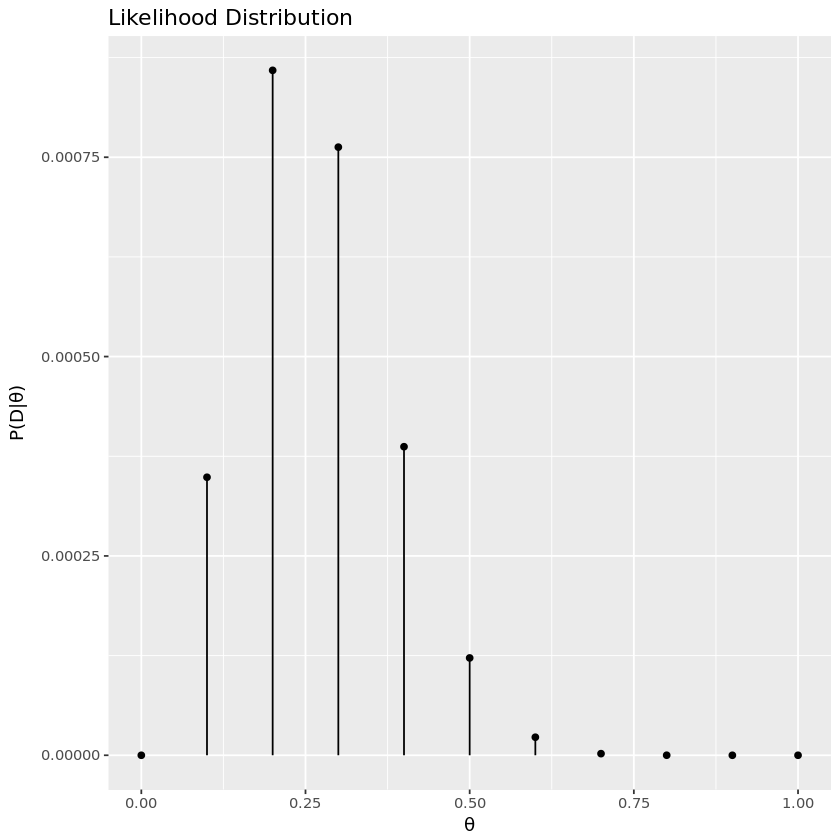

In [6]:
plot_likelihood_prob_distr(likelihood.df)


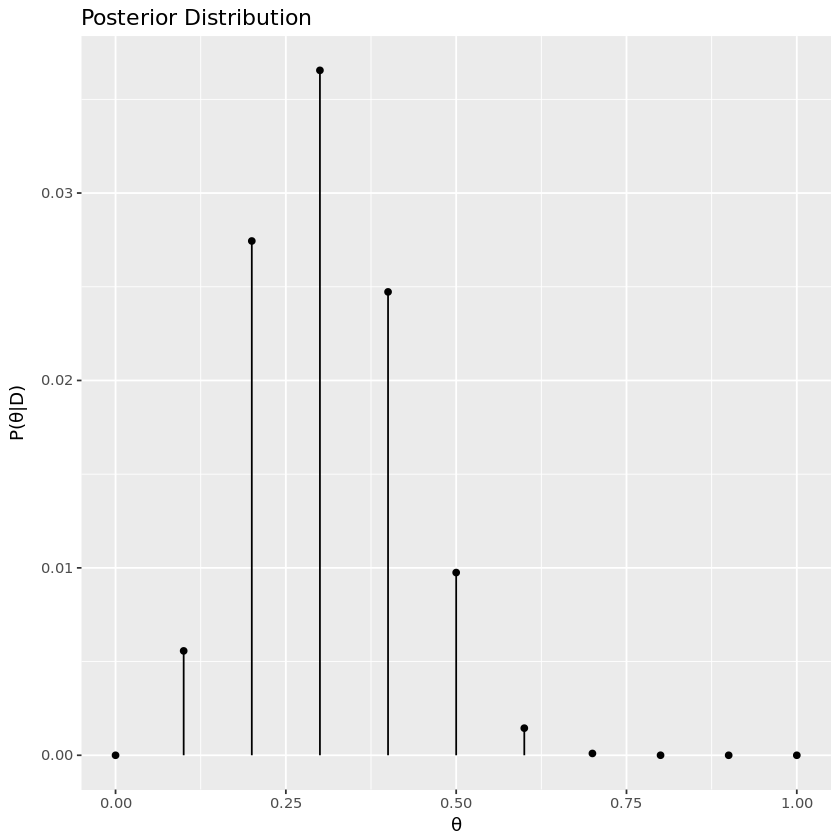

In [7]:
plot_posterior_prob_distr(posterior.df, theta.vals)

In [9]:
# To sample
mean(sample(11,10,prob = posterior.df$post_prob,replace = T))

[1] 4.3

-The above should really be an MCMC using perhaps the metropolis algorithm.
-Additionally, the above was done with conjugate priors (so no integral was necessary)

Hypothesis testing gives a general proportion that, based solely on the data, gives an idea of the strength of a conclusion. 
Bayesian inference updates a previous belief in order to get to the correct conclusion.

While both can given an interval (Confidence or Credibility), one says that a researcher is 95% (or whatever the alpha) confident that the mean will be within a certain range. The other (credibility) says that a researcher would get a result in a specific range 95 times if the experiment were run 100 times.

Both are helpful ways to determine the truth.


REFERENCES

How to Do Bayesian Inference 101 from Fong Chun Chan's Blog http://tinyheero.github.io/2017/03/08/how-to-bayesian-infer-101.html

Baby Bayes using R by Rebecca C Steorts http://www2.stat.duke.edu/~rcs46/books/babybayes-master.pdf 

Using R for Bayesian Statistics https://a-little-book-of-r-for-bayesian-statistics.readthedocs.io/en/latest/src/bayesianstats.html 

Using R to Think About Bayesian Inference by John Miyamoto https://faculty.washington.edu/jmiyamot/p548/demo.02-1.p548.w17.pdf 

Nice R Code by Rich FitzJohn and Daniel Falster https://nicercode.github.io/guides/mcmc/ 
